
# Problems

In [34]:
 # Dates & Times. https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F22%2Ddatetime%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Eca70c99c%2D5d51%2D4c6a%2D8743%2D670d34da45a7
import datetime as dt

 # Data frames
import pandas as pd

# Yahoo finance data.
import yfinance as yf


## Problem 1: Data from yfinance

Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:
Facebook (META)  
Apple (AAPL)  
Amazon (AMZN)  
Netflix (NFLX)  
Google (GOOG)  

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

https://github.com/ranaroussi/yfinance


In [35]:
# Get the data for Microsoft. - TO BE REMOVED
dat = yf.Ticker("MSFT")

In [36]:
# have a look. - TO BE REMOVED
#dat.history(period='1mo')


In [37]:
# https://ranaroussi.github.io/yfinance/
#tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

sTEP 1:
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

In [38]:
 # Set up the function 'get_data()' that can be called for hourly prices of FAANG stocks over the last 5 days
def get_data(): 
    df = yf.download("META AAPL AMZN NFLX GOOG", period="5d")
    return df

# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

 # Call the function
df = get_data()

/tmp/ipykernel_3100/1000238927.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("META AAPL AMZN NFLX GOOG", period="5d")
[*********************100%***********************]  5 of 5 completed


In [39]:
# can remove
type(df)

pandas.core.frame.DataFrame

In [40]:
# can remove
df.head

<bound method NDFrame.head of Price            Close                                                   \
Ticker            AAPL        AMZN        GOOG        META         NFLX   
Date                                                                      
2025-11-10  269.429993  248.399994  290.589996  631.760010  1120.069946   
2025-11-11  275.250000  249.100006  291.739990  627.080017  1136.439941   
2025-11-12  273.470001  244.199997  287.429993  609.010010  1157.500000   
2025-11-13  272.950012  237.580002  279.119995  609.890015  1154.229980   
2025-11-14  272.410004  234.690002  276.980011  609.460022  1112.170044   

Price             High                                                   ...  \
Ticker            AAPL        AMZN        GOOG        META         NFLX  ...   
Date                                                                     ...   
2025-11-10  273.730011  251.750000  291.459991  635.000000  1128.199951  ...   
2025-11-11  275.910004  249.750000  292.339996  6

step 3 :
save the file down in CSV format using the naming convention
format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds.



In [41]:

# https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F21%2Dsaving%2Ddata%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2E4010ac0b%2D5f2f%2D49bd%2Da4c3%2Daff9bc770d09



# Show current date & time                                        #Ref. - https://docs.python.org/3/library/datetime.html
now = dt.datetime.now()

#Show date & time
now

#Format date & time for current date & time above as a string -  'now' 
now.strftime("%Y%m%d-%H:%M:%S")             # Ref. format codes - https://docs.python.org/3/library/datetime.html#format-codes

'20251115-15:46:18'

In [42]:
# File Name - Save to data folder # cOMMENT oCT 19TH - nEED TO ADD LOCATION OF folder where file will save
filename = "Data/" + now.strftime("%Y%m%d-%H:%M:%S")+ ".csv"



In [43]:
# Save timestamped csv to Data folder
df.to_csv(filename)




## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html



In [51]:
#Call plot

#df.plot()
# Check columns so we can see what we are working with & columns required
df.columns




MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

<Axes: xlabel='Date'>

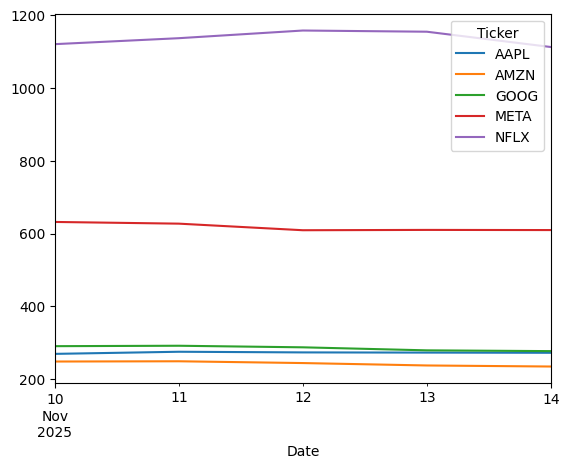

In [ ]:
#Closing prices for 5 stocks - put as variable so can easily amend single line if future stocks added
closing_Prices = df['Close']

# Plot the closing prices
closing_Prices.plot()



## Problem 3: Script

Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook

Added a shebang line
#! /usr/bin/env python  

so that we could run the python code without stating python prior to running  **NOTE 15th Nov: Add comparison table of before and after this step**
faang.py was not exucatable so we used chmod u+x faang.py to allow the file to be executed, previously was read only access
ls -l to check if file execuatbele or just rw
be creful that we instruct on command line to look to current folder as does not auto pick up ./faang.py as an example

## Problem 4: Automation

Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

 ## End